<a href="https://colab.research.google.com/github/M-o-ha-med/ProyekMLT/blob/main/Fetal_Health_Mohamed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projek Pertama Machine Learning Terapan - Mohamed

## Latar belakang

Dalam dunia medis, pemantauan kesehatan janin selama kehamilan merupakan aspek penting untuk mencegah komplikasi yang dapat membahayakan ibu maupun janin. Salah satu metode pemantauan yang umum dilakukan adalah melalui kardiotokografi (CTG), yang merekam denyut jantung janin dan kontraksi rahim. Namun, interpretasi data CTG secara manual oleh tenaga medis bisa sangat subjektif dan bervariasi.

Menurut World Health Organization (WHO), sekitar 2,4 juta bayi meninggal pada bulan pertama kehidupan setiap tahunnya, banyak di antaranya dapat dicegah dengan pemantauan dan penanganan kehamilan yang lebih baik \[1]. Model klasifikasi otomatis berbasis machine learning dapat membantu mengidentifikasi kondisi janin sebagai "normal", "suspect", atau "pathological", sehingga dokter dapat mengambil tindakan yang tepat lebih cepat.

Oleh karena itu, untuk mengurangi resiko dari meninggalnya bayi , maka diperlukan penerapan machine learning dalam klasifikasi kesehatan janin dapat membantu meningkatkan akurasi diagnosis dan efisiensi kerja dokter.

merujuk pada penelitian yang serupa dilakukan oleh (Mehbodniya, 2022) dan (Salini , 2024), ditemukan bahwa penerapan machine learning dapat memberikan prediksi dengan akurasi yang cukup menjanjikan  yang diukur berdasarkan metrik akurasi , presisi, skor f1, dan recall. yang menandakan bahwa penggunaan Machine learning dapat meningkatkan akurasi dari diagnosia kondisi kesehatan janin berdasarkan hasil CTG.



## Mengimport library yang dibutuhkan

In [1]:
import kagglehub
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report ,f1_score , precision_score, recall_score
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


# Data Loading

Dataset yang digunakan merupakan dataset yang berasal dari kaggle, yang diterbitkan oleh andrewmvd dengan judul fetal health classification. Dataset ini memiliki 2126 baris dan 21 kolom dengan total 22 fitur yang terdiri dari 21 fitur independen dan 1 fitur dependen atau label. jenis data dari dataset bertipe kuantitatif.

In [2]:
# Download latest version
path = kagglehub.dataset_download("andrewmvd/fetal-health-classification")

print("Path to dataset files:", path)

100%|██████████| 45.8k/45.8k [00:00<00:00, 37.9MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/andrewmvd/fetal-health-classification/versions/1


In [3]:
DATA_DIR = f'{path}/{os.listdir(path)[0]}'
df = pd.read_csv(DATA_DIR)

# Exploratory Data Analysis (EDA)

## Melihat kolom dan tipe data dari kolom pada dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

dataset ini berjenis data kuantitatif, dimana hal tersebut terbukti dari seluruh data yang memiliki tipe data float64. terdapat 2126 entri data di dalam dataset serta terdapat 22 kolom di dalamnya.

## Melihat 5 data teratas pada Dataset

In [5]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


Tabel diatas merupakan contoh dari bentuk data yang berada di dalam dataset.

# Melihat statistik deskriptif

In [6]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


Tabel diatas merupakan tabel yang menjabarkan statistik deskriptif dari setiap kolom, hampir keseluruhan kolom memiliki distribusi nilai yang normal namun terdapat beberapa kolom yang sedikit lebih tinggi daripada rentang data pada umumnya yang menandakan adanya outlier, sehingga butuh pemeriksaan tambahan menggunakan boxplot untuk menyakinkan bahwa terdapat outlier di dalam datanya.

## Membuat visualisasi boxplot untuk mengidentifikasi Outlier pada tiap kolom dalam dataset

5 5


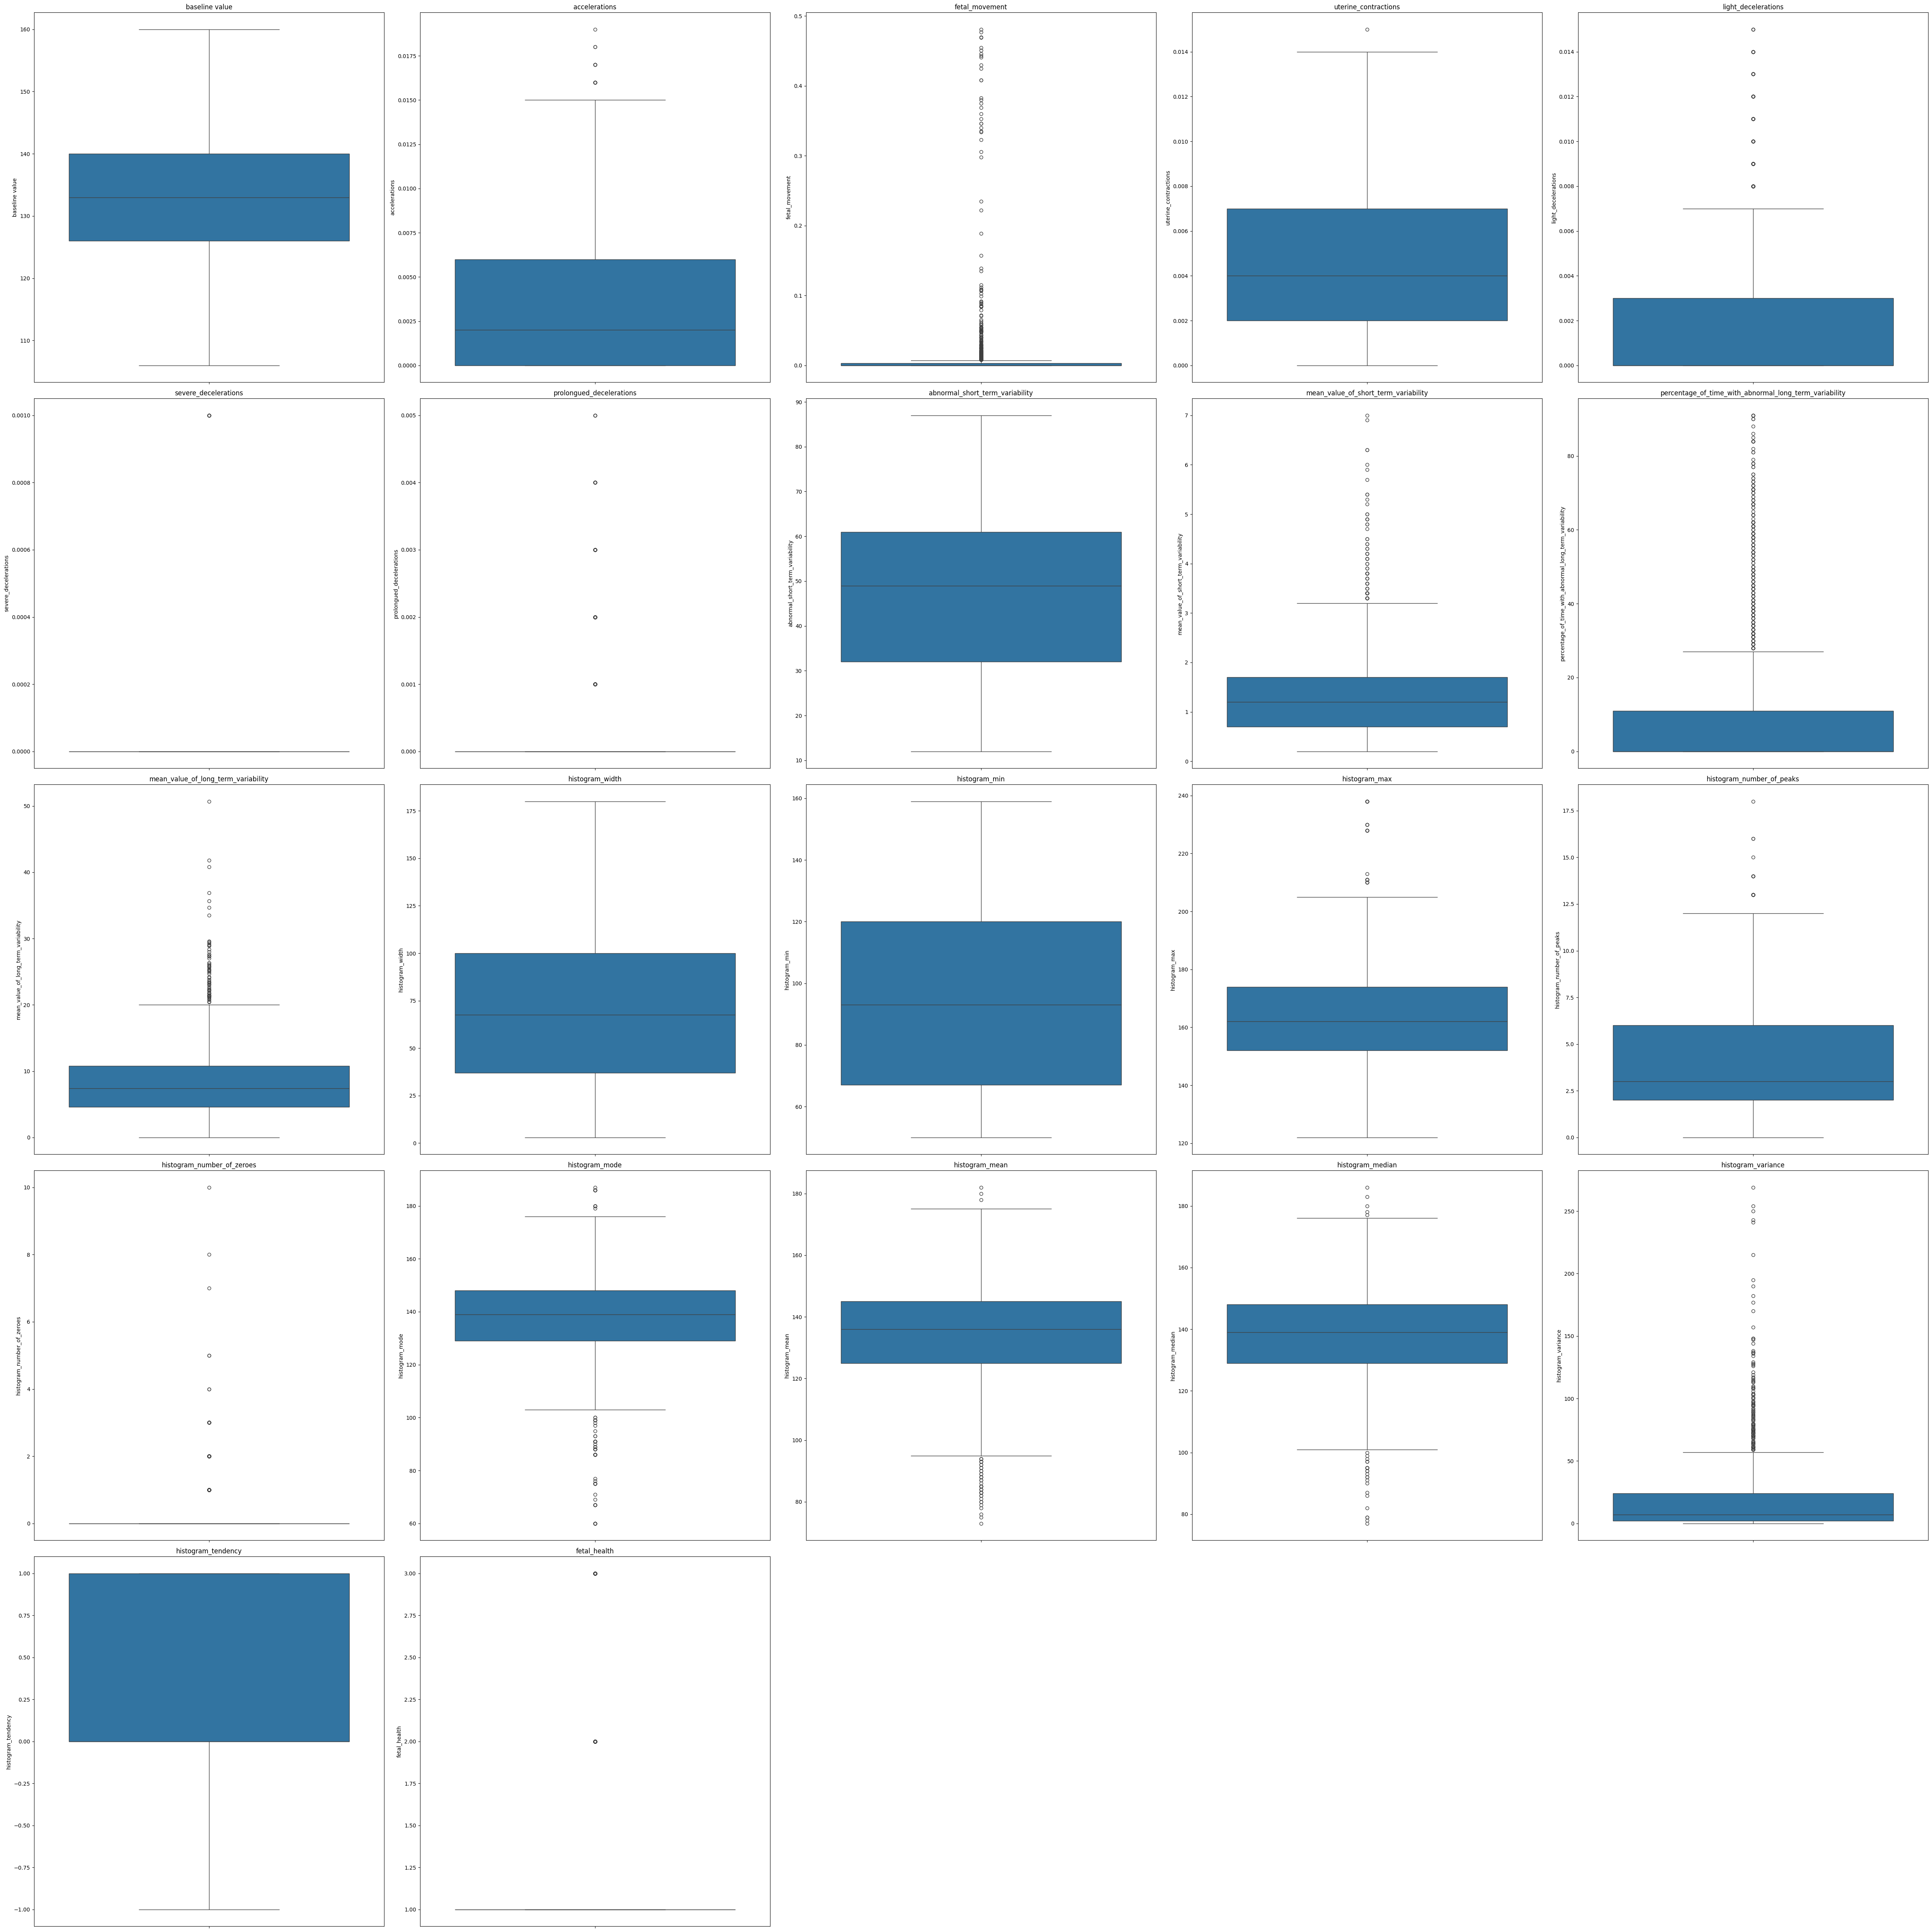

In [7]:
def show_boxplots(df):
  rows = int(np.ceil(np.sqrt(len(df.columns))))
  cols = int(np.ceil(len(df.columns) / rows))
  print(rows,cols)
  fig, ax = plt.subplots(rows, cols, figsize=(10*cols, 10*rows))
  ax = ax.flatten()
  for (idx , feature) in enumerate(df.columns):
    sns.boxplot(df[feature], ax=ax[idx])
    ax[idx].set_title(feature)

  for j in range(idx + 1, len(ax)):
      fig.delaxes(ax[j])
  plt.tight_layout()
  plt.show()

show_boxplots(df)

Dari boxplot diatas , terlihat adanya outlier yang cukup banyak dalam namun setelah pertimbangan dengan melihat data statistika deskriptif yang masih sesuai secara fisiologis serta melihat jumlah outlier yang banyak yang apabila dihapus dapa mengurangin jumlah data secara signifikan dan hal tersebut dapat berpengaruh terhadap proses pelatihan model.

## Mengecek nilai kosong di dalam setiap kolom pada dataset

In [8]:
df.isna().sum()

,0
baseline value,0
accelerations,0
fetal_movement,0
uterine_contractions,0
light_decelerations,0
severe_decelerations,0
prolongued_decelerations,0
abnormal_short_term_variability,0
mean_value_of_short_term_variability,0
percentage_of_time_with_abnormal_long_term_variability,0


Dari tabel diatas, terlihat tidak ada *missing value* pada setiap kolom sehingga tidak diperlukan tindakan lanjut untuk mengatasi *missing value*

## Mengecek nilai duplikat pada setiap kolom di dalam dataset

In [9]:
df.duplicated().sum()


np.int64(13)

Terdapat 13 data duplikat sehingga diperlukan penghapusan terhadap data duplikat, hal ini didasari karena penghapusan data tersebut tidak mempengaruhi dataset secara signifikan sehingga tindakan tersebut merupakan tindakan yang masuk akal.

## Membuat Pie Chart untuk visualisasi distribusi kelas atau label pada dataset

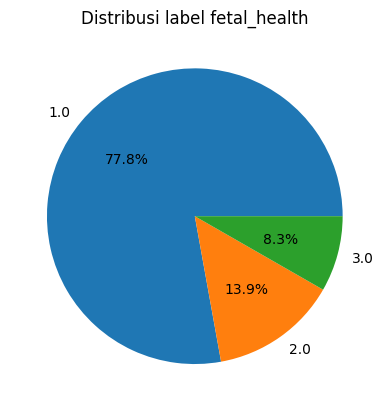

In [10]:
plt.pie(df['fetal_health'].value_counts(), labels = df['fetal_health'].value_counts().index, autopct='%1.1f%%')
plt.title('Distribusi label fetal_health')
plt.show()

## Membuat Bar Chart untuk visualisasi distribusi kelas atau label pada dataset

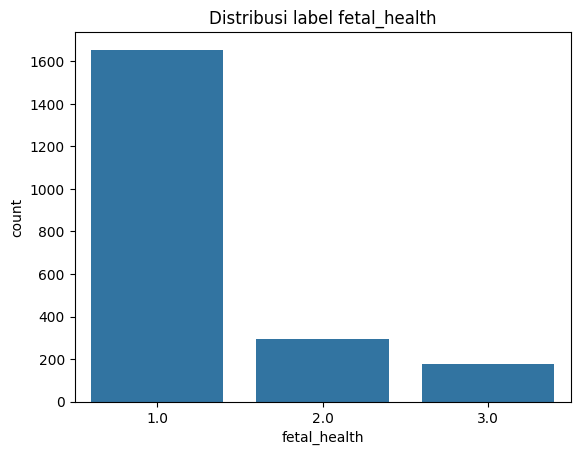

In [11]:
sns.countplot(x='fetal_health', data=df)
plt.title('Distribusi label fetal_health')
plt.show()

Dari kedua visualisasi diatas , dapat disimpulkan bahwa distribusi data tidak seimbang dengan label 1.0 pada kolom fetal_health yang mendominasi di kisaran 1600 kolom atau 77.8% dari keseluruahn data pada kolom fetal_health, sehingga dibutuhkan tindakan augmentasi data untuk menyeimbangkan data menggunakan metode SMOTE.

## Membuat grafik histogram untuk mengidentifikasi distribusi data dari setiap kolom.

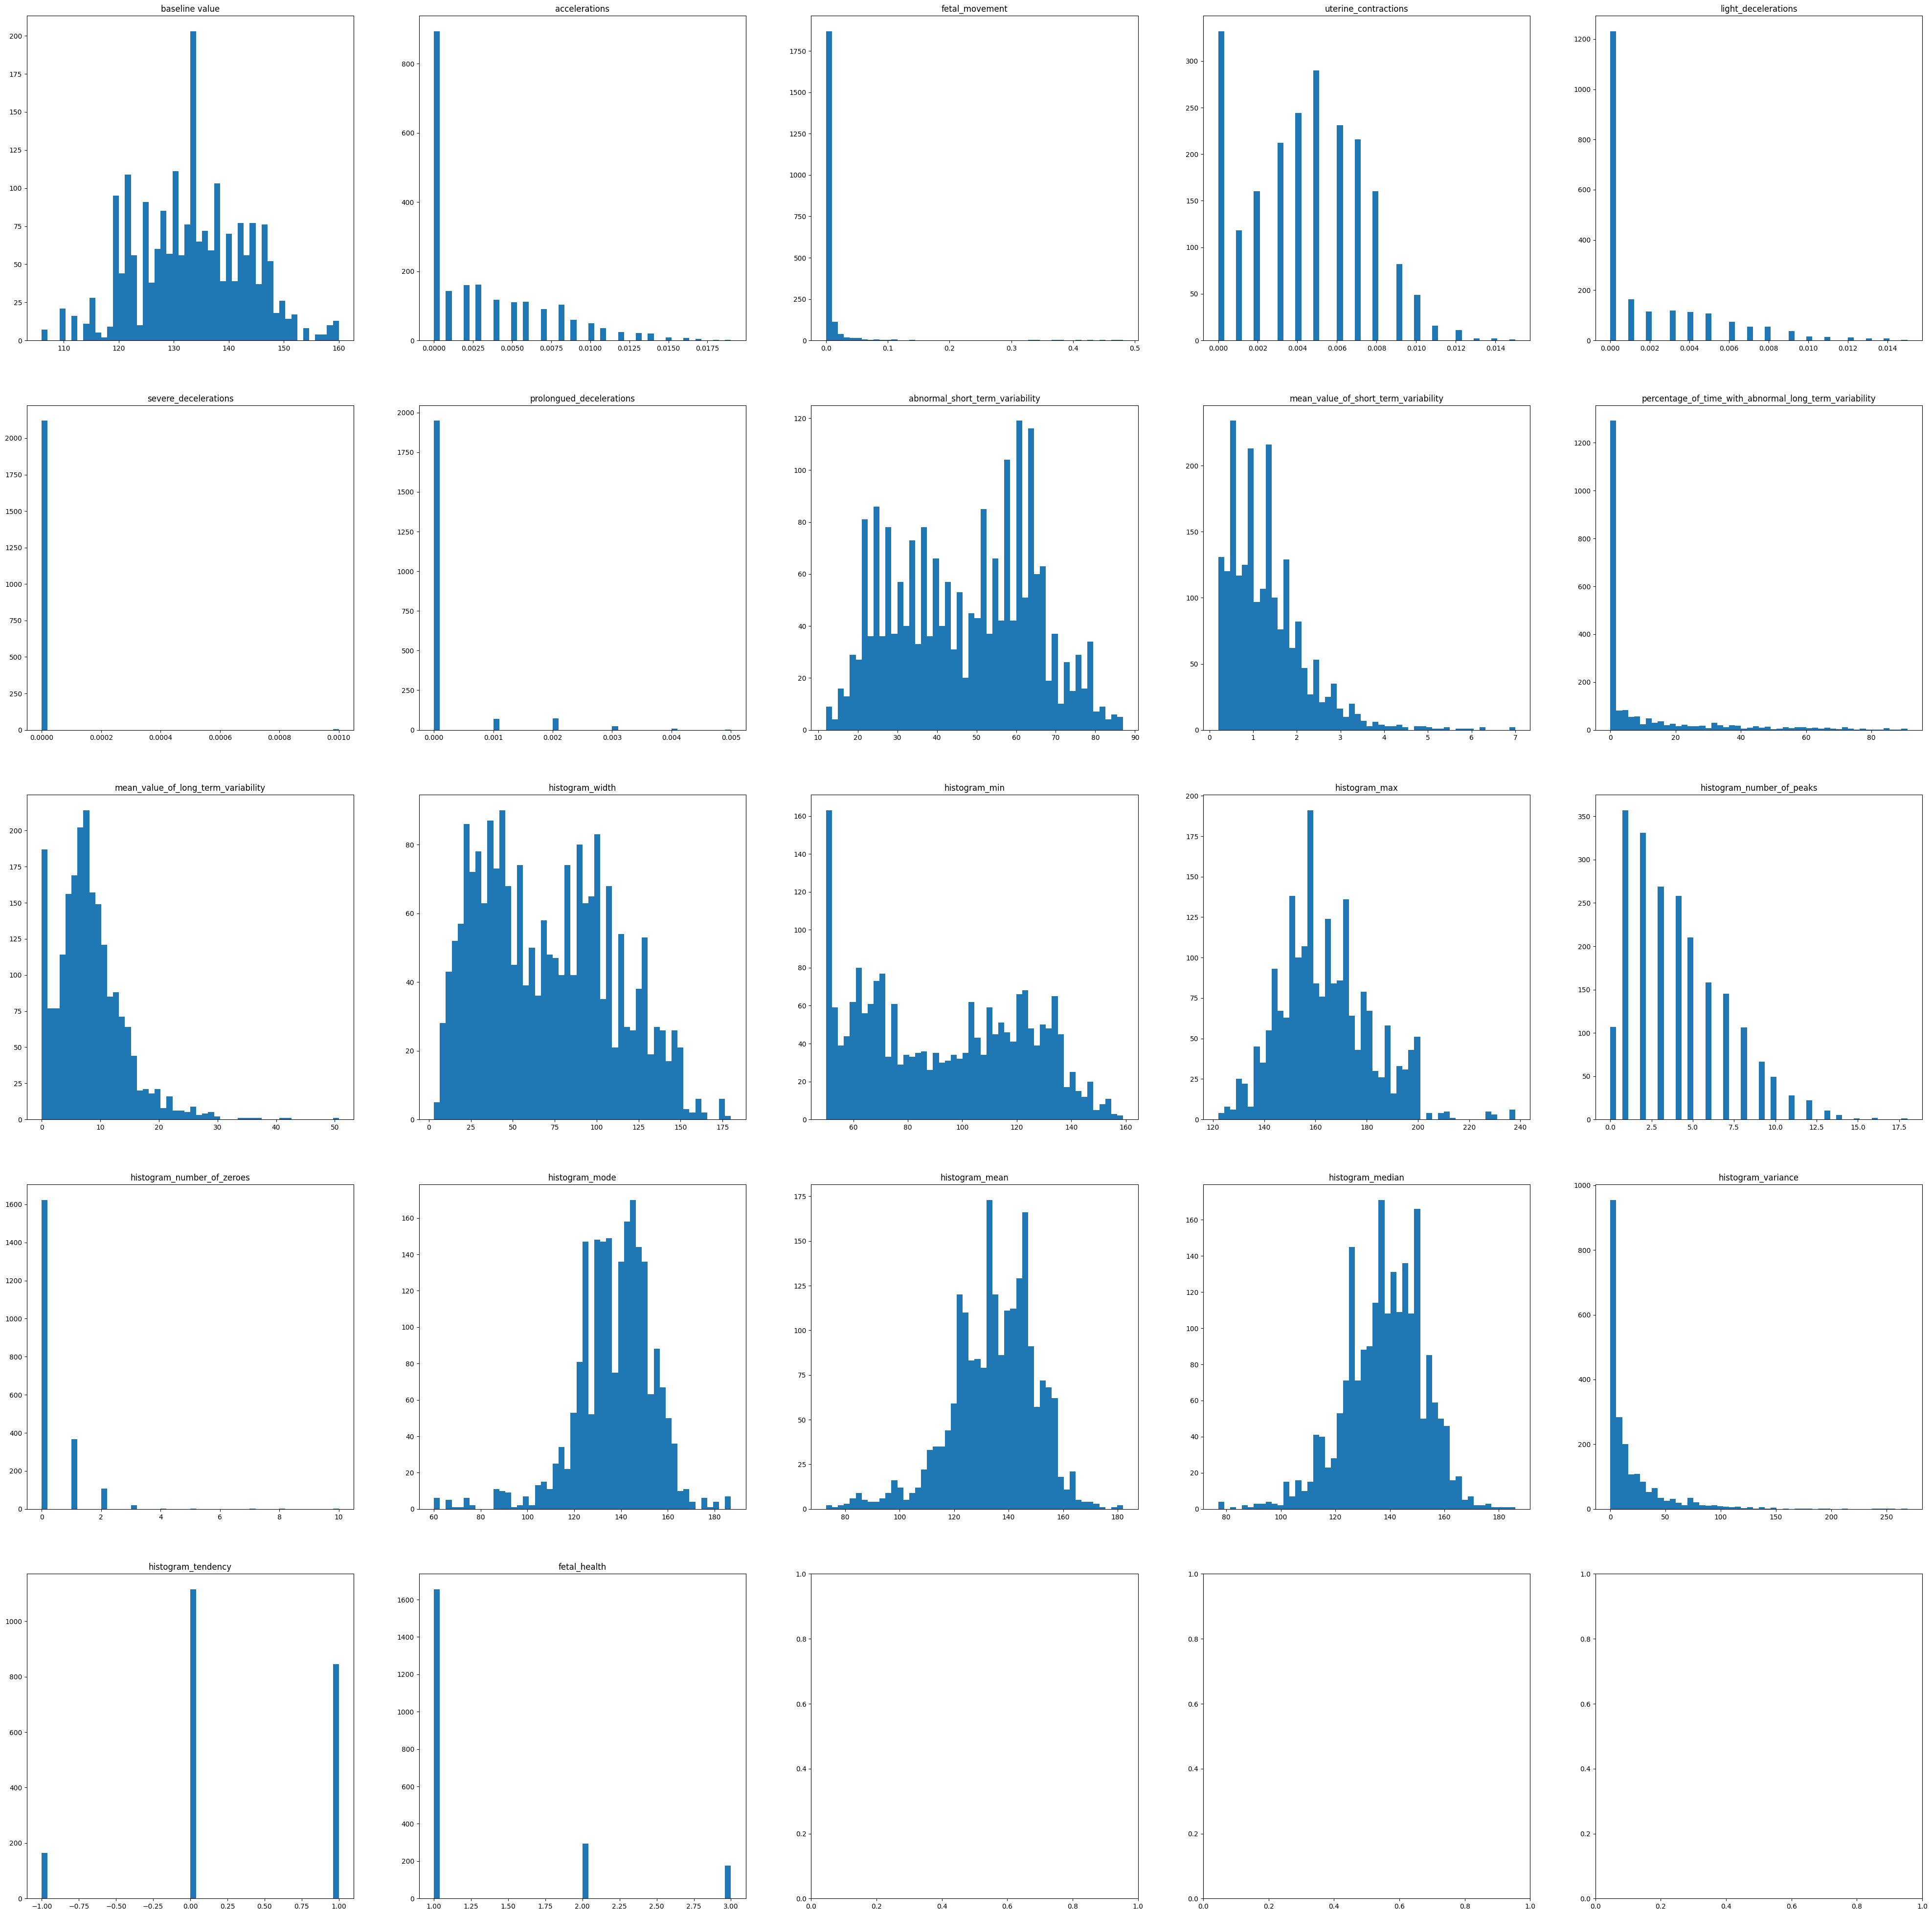

In [12]:
rows = int(np.ceil(np.sqrt(len(df.columns))))
cols = int(np.ceil(len(df.columns) / rows))
fig, ax = plt.subplots(rows, cols, figsize=(10*cols, 10*rows))
ax = ax.flatten()
for idx , column in enumerate(df.columns):
  ax[idx].hist(x = df[column] , bins=50)
  ax[idx].set_title(column)
plt.show()

Dari histogram diatas , terlihat bahwa persebaran nilai dari setiap kolom cenderung *right skewed*, terdapat beberapa kolom yang terdistribusi secara normal dan juga terdapat beberapa kolom yang memiliki persebaran nilai yang cenderung lebih ke *left skewed* sehingga diperlukan normalisasi pada data agar membuat persebaran data menjadi lebih normal .



## Membuat Heat map untuk visualisasi korelasi antar kolom dalam dataset

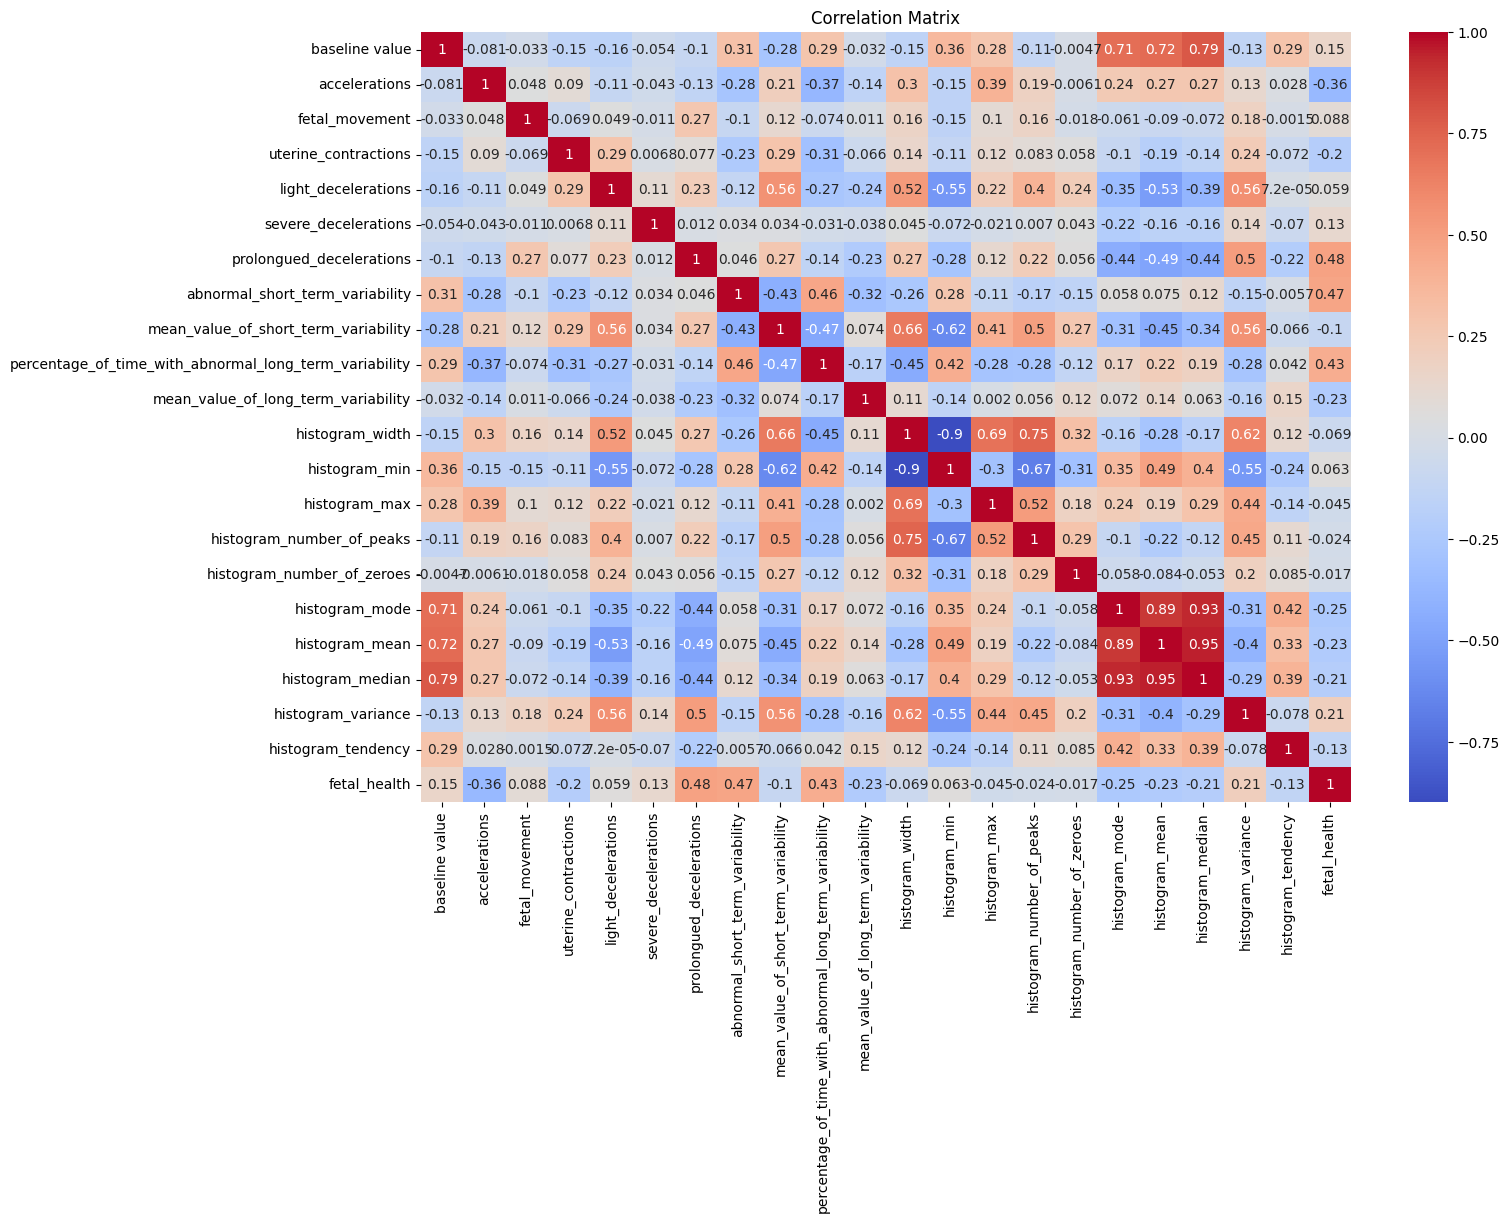

In [13]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Dari heatmap, didapatkan beberapa insight :

tingkat korelasi antara kolom fetal_health dengan kolom lain tidak tidak terlalu tinggi menandakan kurangnya korelasi antara kolom fetal_health dengan kolom lainnya, tingkat korelasi terbesar 0.48 merupakan tingkat korelasi terbesar dari kolom fetal_health dengan kolom prolongued_decelerations sedangkan tingkat korelasi terkecil -0.069 merupakan tingkat korelasi terkecil dari kolom fetal_health dengan kolom histogram_width.




Dari proses EDA yang telah dilakukan, didapatkan beberapa insight terkait dengan dataset, yaitu :

1.   Terdapat 13 data duplikat ditemukan dalam dataset, penghapusan data duplikat perlu dilakukan agar dapat meningkatkan konvergensi dari model yang akan dilatih.

2.   Tidak ditemukan *missing value* di dalam dataset sejauh ini sehingga tidak ada tindakan yang perlu diambil.

3. Terdapat banyak nilai outlier di dalam dataset terbukti dari banyaknya nilai outlier ekstrim di dalam boxplot, namun setelah dipertimbangkan data tersebut tidak jadi dihapuskan karena dapat mengurangi jumlah data secara signifikan dan menurunkan performa model serta data tersebut normal secara fisiologis.

4. sebanyak 77.8% atau sekitar 1600 baris berlabel 1 atau normal, dilanjut dengan label 2 atau suspect sebanyak 13.9 % atau sekitar 300 baris dan terakhir label 3 atau pathological sebanyak 8.3% atau sekitar kurang dari 200 baris yang menunjukkan bahwa distribusi label atau kelas pada dataset tidak seimbang atau *imbalance* , pernyataan ini didasari dari visualisasi menggunakan pie chart dan barchart. penggunaan SMOTE untuk augmentasi data menjadi solusi yang tepat bagi permasalahan tersebut.

5. Dari histogram diatas , terlihat bahwa persebaran nilai dari setiap kolom cenderung *right skewed*, terdapat beberapa kolom yang terdistribusi secara normal dan juga terdapat beberapa kolom yang memiliki persebaran nilai yang cenderung lebih ke *left skewed* sehingga diperlukan normalisasi pada data agar membuat persebaran data menjadi lebih normal .


6. Berdasarkan visualisasi heatmap, fitur fetal_healt memiliki tingkat korelasi medioker, dimana tingkat korelasi tertinggi berada pada kisaran 0.48 dan terendah pada kisaran -0.069. fitur dengan tingkat korelasi tertinggi adalah fitur yang berkaitan dengan histogram , dimana histogram_median memiliki tingkat korelasi tertinggi sebesar 0.95 dengan histogram_mean.
tingkat korelasi antara kolom fetal_health dengan kolom lain tidak tidak terlalu tinggi menandakan kurangnya korelasi antara kolom fetal_health dengan kolom lainnya, tingkat korelasi terbesar 0.48 merupakan tingkat korelasi terbesar dari kolom fetal_health dengan kolom prolongued_decelerations sedangkan tingkat korelasi terkecil -0.069 merupakan tingkat korelasi terkecil dari kolom fetal_health dengan kolom histogram_width.





#Data Preparation

## Menghapus nilai duplikat dari dalam dataset

In [14]:
df.drop_duplicates(inplace=True)

Data duplikat telah dihapus sehingga data siap untuk diolah lebih lanjut, dalam hal ini ialah pemisahan antara variabel independen dan variabel dependen dari dataset ke dalam dua variabel yang berbeda (X dan y)

## Memisahkan antara variabel independen dan variabel dependen serta melakukan splitting data dan augmentasi data untuk menyeimbangkan data latih.

In [ ]:
X = df.drop(['fetal_health'],axis = 1)
y = df['fetal_health']

Data independen dan dependen atau label dipisahkan terlebih dahulu, dimana variabel X memuat data independen sedangkan variabel y memuat data dependen atau label.

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size = 0.2 , stratify=y , random_state = 42)


dilakukan splitting data menjadi data latih  dan data tes, dengan perbandingan 80 : 20 , 80 % untuk data latih dan 20 % untuk data tes. dengan menambahkan argumen stratify pada argumen fungsi supaya menjaga distribusi dari kelas.

In [ ]:
Scaler = MinMaxScaler()
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.transform(X_test)

dilakukan proses normalisasi pada data latih guna mempermudah model dalam melakukan prekdisi data.

In [15]:
smote = SMOTE()
X_train_resampled , y_train_resampled = smote.fit_resample(X_train , y_train)

(1690, 21) (423, 21) (1690,) (423,)
(3948, 21) (423, 21) (3948,) (423,)


dilakukan augmentasi data pada data latih menggunakan SMOTE untuk bisa menyeimbangkan data pada masing-masing kelas terutama pada data dengan label 2.0 dan 3.0

Hasil akhir :

1.   Sebanyak 13 data duplikat berhasil dihapus untuk menjaga kondisi dari data agar dapat menjaga kualitas model
2.   dilakukan pemisahan variabel independen dan variabel dependen ke dalam dua variabel X dan y untuk memudahkan proses splitting data.
3.   telah dilakukan splitting data dengan ukuran data testing sebesar 20% dan data latih atau training sebesar 80%
4.   telah dilakukan proses normalisasi pada data latih untuk mempermudah model dalam memprediksi data serta menormalisasi distribusi dari persebaran nilai di dalam kolom

5.   telah dilakukan proses augmentasi data menggunakan SMOTE, didapat bahwa data latih bertambah menjadi 3948 sampel dari yang sebelumnya hanya 1690



# Modeling & Evaluasi

## Membuat fungsi untuk evaluasi performa dari model

In [32]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Precision Score : {precision_score(y_test, y_pred, average='weighted'):.2f}")
    print(f"Recall Score : , {recall_score(y_test, y_pred, average='weighted'):.2f}")
    print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.2f}")
    print("-"*50)
    sns.heatmap(confusion_matrix(y_test , y_pred) , annot = True ,cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    print("-"*50)

fungsi ini dibuat untuk mempermudah dalam melakukan proses evaluasi pada tiap-tiap model.

## Melakukan proses training pada model KNN, RF, SVM, dan GB menggunakan data hasil splitting.

In [33]:
model_knn = KNeighborsClassifier()
model_rf = RandomForestClassifier(n_estimators=300,max_depth=2,random_state=42)
model_svm = SVC()
model_gb = GradientBoostingClassifier(learning_rate = 0.1,n_estimators=100,max_depth=3)

Dilatih 4 model yaitu :


1.   K-Nearest Neighbors (KNN)
2.   Random Forest
3.   SVM
4.   GradientBoosting

keempat model ini akan dievaluasi menggunakan 4 metrik , yaitu :


1.   Akurasi
2.   Precision
3.   Recall
4.   F1-Score

tidak akan ada hyperparameter tuning dikarenakan model terbaik yang akan dipilih untuk digunakan dalam prediksi data.





## Menampilkan evaluasi dari hasil latih pada masing-masing model

KNN
Accuracy: 0.88
Precision Score : 0.90
Recall Score : , 0.88
F1 Score: 0.89
--------------------------------------------------


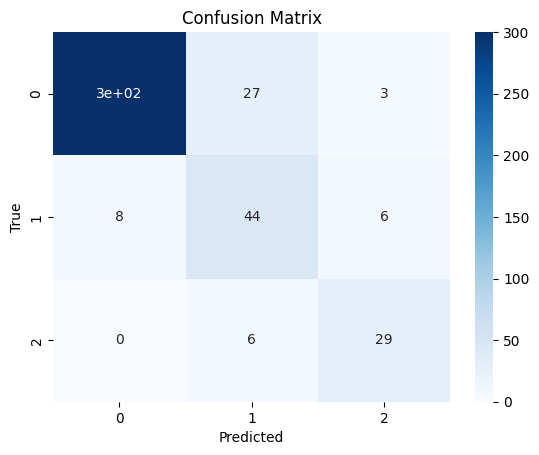

--------------------------------------------------
Random Forest
Accuracy: 0.85
Precision Score : 0.87
Recall Score : , 0.85
F1 Score: 0.86
--------------------------------------------------


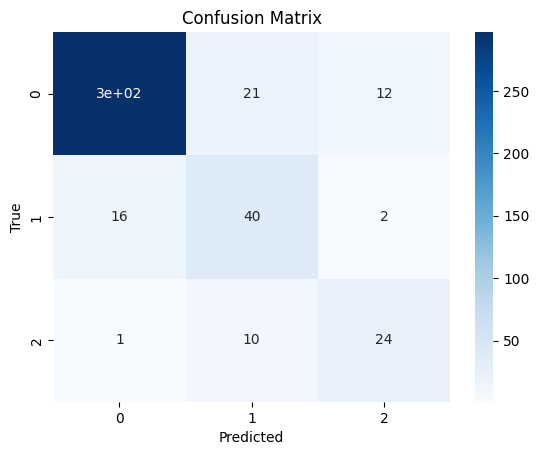

--------------------------------------------------
SVM
Accuracy: 0.90
Precision Score : 0.92
Recall Score : , 0.90
F1 Score: 0.91
--------------------------------------------------


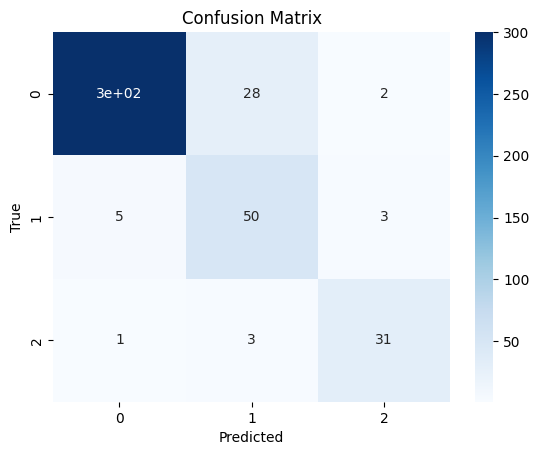

--------------------------------------------------
Gradient Boosting
Accuracy: 0.94
Precision Score : 0.93
Recall Score : , 0.94
F1 Score: 0.93
--------------------------------------------------


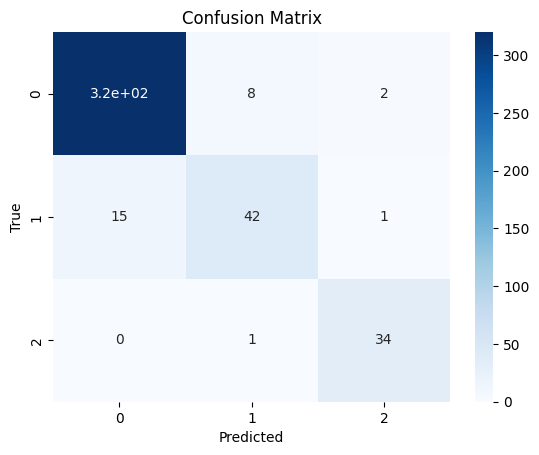

--------------------------------------------------


In [34]:
print("KNN")
evaluate_model(model_knn, X_train_resampled , y_train_resampled, X_test, y_test)
print("Random Forest")
evaluate_model(model_rf, X_train_resampled , y_train_resampled, X_test, y_test)
print("SVM")
evaluate_model(model_svm, X_train_resampled , y_train_resampled, X_test, y_test)
print("Gradient Boosting")
evaluate_model(model_gb,X_train_resampled , y_train_resampled, X_test, y_test)



## 1. K-Nearest Neighbors (KNN)

### Deskripsi:
KNN adalah algoritma klasifikasi (atau regresi) berbasis instance-based learning. Saat memprediksi, KNN mencari `k` tetangga terdekat dari data uji dan menggunakan mayoritas kelas dari tetangga tersebut.

### Rumus (jarak Euclidean):
$$d(x, x_i) = \sqrt{\sum_{j=1}^{n} (x_j - x_{ij})^2}$$

**Keterangan:**
- $d(x, x_i)$ : Jarak Euclidean antara titik uji $$x$$ dan data latih ke- $$i$$
- $x$ : Vektor fitur dari data uji  
- $x_i$ : Vektor fitur dari data latih ke- $$i$$  
- $x_j$ : Nilai fitur ke- $$j$$ pada data uji  
- $x_{ij}$ : Nilai fitur ke- $$j$$ pada data latih ke- $$i$$  
- $n$ : Jumlah fitur (dimensi data)

### Parameter:
- `n_neighbors=5`: jumlah tetangga yang dipertimbangkan  
- `weights='uniform'` : semua tetangga memiliki bobot yang sama  
- `metric='minkowski'`, `p=2` : menggunakan jarak Euclidean  

### Kelebihan:
- Sederhana dan mudah dipahami  
- Cocok untuk dataset kecil  
- Tidak memerlukan pelatihan (lazy learning)  

### Kekurangan:
- Sensitif terhadap outlier  
- Lambat pada dataset besar  
- Sensitif terhadap skala fitur (butuh normalisasi)  

---

## 2. Random Forest

### Deskripsi:
Random Forest adalah metode ensemble berbasis pohon keputusan. Algoritma ini membangun banyak decision tree secara acak, lalu menggabungkan hasilnya untuk prediksi (voting atau rata-rata).

### Rumus (voting mayoritas):
$$\hat{y} = \text{mode}(T_1(x), T_2(x), \ldots, T_k(x))$$

**Keterangan:**
- $T_i(x)$ : prediksi dari decision tree ke $$i$$  
- $\hat{y}$ : hasil prediksi akhir  

### Parameter:
- `n_estimators=300`: jumlah pohon  
- `max_depth=2`: kedalaman maksimum pohon
- `random_state=42`: agar hasil bisa direproduksi  

### Kelebihan:
- Tahan terhadap overfitting  
- Menangani data tidak seimbang dengan baik  
- Memberikan informasi pentingnya fitur  
- Bekerja baik pada data numerik maupun kategorikal  

### Kekurangan:
- Lambat untuk pelatihan data besar  
- Tidak sebaik gradient boosting untuk prediksi presisi tinggi  
- Agak sulit untuk interpretasi individual tree  

---

## 3. Support Vector Machine (SVM)

### Deskripsi:
SVM mencari hyperplane optimal yang memisahkan kelas dengan margin terbesar. Cocok untuk data berdimensi tinggi dan linear/non-linear tergantung kernel yang digunakan.

### Rumus (untuk SVM linear):
$$\min_{w,b} \frac{1}{2} \|w\|^2 \quad \text{dengan syarat: } y_i(w \cdot x_i + b) \geq 1$$

**Keterangan:**
- $w$ : vektor bobot  
- $b$ : bias  
- $x_i$ : data ke- $$i$$  
- $y_i$ : label data ke- $$i$$  
- Margin = $$\frac{2}{\|w\|}$$

### Parameter:
- `C=1.0`: parameter regulasi  
- `kernel='rbf'`: kernel radial basis function  
- `gamma='scale'`: parameter skala untuk kernel  

### Kelebihan:
- Akurat untuk data berdimensi tinggi  
- Bisa menangani data non-linear dengan kernel  
- Efektif jika data punya margin pemisahan yang jelas  

### Kekurangan:
- Lambat untuk dataset besar  
- Boros memori  
- Parameter kernel dan regulasi harus disetel dengan hati-hati  

---

## 4. Gradient Boosting

### Deskripsi:
Gradient Boosting adalah metode ensemble yang membangun model secara bertahap, di mana setiap model baru mengoreksi kesalahan dari model sebelumnya.

### Rumus (prediksi iteratif):
$$F_{m}(x) = F_{m-1}(x) + \gamma_m h_m(x)$$

**Keterangan:**
- $F_{m}(x)$ : model pada iterasi ke- $$m$$
- $h_m(x)$ : decision tree kecil (weak learner) ke- $$m$$
- $\gamma_m$ : learning rate  
- Model meminimalkan loss: $$\mathcal{L}(y, F(x))$$

### Parameter:
- `n_estimators=100`: jumlah boosting stage  
- `learning_rate=0.1`: ukuran langkah koreksi tiap model  
- `max_depth=3`: kedalaman pohon  

### Kelebihan:
- Akurasi tinggi di banyak kompetisi dan masalah real-world  
- Bisa menangani data kategorikal dan numerik  
- Bisa dikontrol dengan tuning (learning rate, max depth)  

### Kekurangan:
- Overfitting jika tidak dikontrol  
- Pelatihan lambat  
- Sensitif terhadap parameter  

---

## **6. Evaluation**

### **Metrik Evaluasi**

1. **Accuracy**

   $$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$$

2. **Precision**

   $$Precision = \frac{TP}{TP + FP}$$

3. **Recall**

   $$Recall = \frac{TP}{TP + FN}$$

4. **F1-Score**

   $$F1 = 2 \times \frac{Precision \times Recall}{Precision + Recall}$$

#### Keterangan
- $TP$ : jumlah prediksi benar untuk nilai positif oleh model
- $TN$ : jumlah prediksi benar untuk nilai negatif oleh model
- $FP$ : jumlah prediksi salah untuk nilai positif oleh model
- $FN$ : jumlah prediksi salah untuk nilai negatif oleh model


### **Hasil Evaluasi**

| Model             | Accuracy | Precision | Recall   | F1-Score |
| ----------------- | -------- | --------- | -------- | -------- |
| KNN               | 0.88     | 0.90      | 0.88     | 0.89     |
| Random Forest     | 0.85     | 0.87      | 0.85     | 0.86     |
| SVM               | 0.90     | 0.92      | 0.90     | 0.91     |
| Gradient Boosting | **0.94** | **0.93**  | **0.94** | **0.93** |




### **Model Terbaik**

Berdasarkan hasil evaluasi terhadap masing-masing model, **Gradient Boosting** merupakan model terbaik dikarenakan memiliki skor evaluasi tertinggi secara konsisten di semua metrik. Model ini dipilih karena:

* Performa prediksi terbaik
* Kemampuan menangani kompleksitas non-linear
* Meningkatkan recall pada kelas minoritas berkat SMOTE

### Keterkaitan dengan Business understanding
1. **Apakah sudah menjawab pertanyaan problem statement ?**

* Bagaimana mengklasifikasikan kondisi kesehatan janin berdasarkan data CTG menjadi “normal”, “suspect”, dan “pathological”?

* Apakah model machine learning mampu mengenali janin dalam kondisi “suspect” dan “pathological” dengan akurasi dan konsistensi yang tinggi?

Dua pertanyaan tersebut sudah terjawab dengan adanya model GradientBoosting yang dapat melakukan prediksi dengan akurat terhadap kondisi kesehatan janin menjadi “normal”, “suspect”, dan “pathological” , terlihat dari metrik akurasi , presisi, reacll, dan skor F1 yang berada di angka diatas 90%

2. **Apakah sudah berhasil mencapai setiap goals yang ada ?**

* Membangun model machine learning yang mampu memprediksi label `fetal_health` dengan akurasi tinggi.

* Mengidentifikasi model terbaik yang dapat digunakan sebagai alat bantu diagnosis kondisi janin.

Sudah terpenuhi, dibuktikan dengan adanya model GradientBoosting yang dapat melakukan prediksi secara akurat dengan metrik akurasi , presisi, reacll, dan skor F1 yang berada di angka diatas 90% yang merupakan model terbaik dibandingkan dengan model lain seperti SVM , KNN , dan Random Forest.

3. **Apakah setiap solution statement yang direncanakan berpengaruh ?**

Sangat berpengaruh, pengujian terhadap 4 model dapat memberikan variasi pilihan serta memberikan pandangan mengenai model yang terbaik dalam hal memprediksi data dari status kesehatan janin,penggunaan metrik pengukuran seperti akurasi,  presisi, recall, dan skor f1 penting dalam menentukan model terbaik ,selain itu juga penggunaan SMOTE dalam proses augmentasi data latih dapat membantu meningkatkan akurasi dari keempat model.